In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stat
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import h2o
from h2o.automl import H2OAutoML

In [3]:
h2o.init(ip ='localhost', port = 54321)




Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,22 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,"14 days, 2 hours and 7 minutes"
H2O_cluster_name:,H2O_from_python_aminp_lwkcss
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.753 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [91]:
#train_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/dataset_train_without_rev_features.csv")
#test_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/dataset_test_without_rev_features.csv")

#test_train = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_train.csv")
#test_test = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_test.csv")
#rev_labels = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/revenue_labels.csv")

#train_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_data.csv")
#test_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_data.csv") 

#test_dist = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_set_with_only_distance_feat.csv")
#train_dist = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_set_with_only_distance_feat.csv")

#train_clusters = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_set_100_clusters.csv")
#test_clusters = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_set_100_clusters.csv")

#stores_train_impuded = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_gk_impuded.csv")
#stores_test_impuded = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_test_impuded.csv")

#pd_stores_impuded = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_gk_impuded.csv")
#pd_test_impuded = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_test_impuded.csv")

#stores_with_gk_income = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_gk_income_train.csv")
#stores_with_gk_income_testset = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_gk_income_test.csv")

train_df = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/new_stores_train.csv")
test_df = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/new_stores_test.csv")

In [83]:
test_df

,store_id,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,...,pt_yeo_distance_to_nasjonalt_knutepunkt,pt_yeo_distance_to_regionalt_knutepunkt,pt_yeo_distance_to_annen_viktig_holdeplass,pt_yeo_distance_to_lv1_desc,pt_yeo_distance_to_lv2_desc,pt_yeo_distance_to_lv3_desc,pt_yeo_distance_to_lv4_desc,pt_yeo_grunnkrets_id_density,pt_yeo_t_district_density,pt_yeo_municipality_name_density
0,914206820-914239427-717245,VÅLERENGA HALAL BURGER AS,1.1.1.0,Hamburger restaurants,3012704,STRØMSVEIEN 25 A,59.908672,10.787031,NaN,NaN,...,-1.023129,-0.771397,-0.306359,-0.652150,-0.704316,-0.224744,-0.265620,2.010546,1.600682,1.605308
1,916789157-916823770-824309,BURGER KING MYREN,1.1.1.0,Hamburger restaurants,8061401,MYREN 1,59.201467,9.588243,BURGER KING,NaN,...,1.163823,-0.680010,-0.414188,-0.663369,-0.708470,-0.094093,-0.141984,0.545715,0.325197,-0.010953
2,913341082-977479363-2948,BURGER KING STOVNER,1.1.1.0,Hamburger restaurants,3013917,STOVNER SENTER 3,59.962146,10.924524,BURGER KING,Stovner Senter,...,0.036897,0.124813,-1.032398,-0.754263,-0.741825,0.694122,0.613924,1.526431,1.016413,1.605308
3,889682582-889697172-28720,BURGER KING TUNGASLETTA,1.1.1.0,Hamburger restaurants,16012104,TUNGASLETTA 16,63.420785,10.461091,BURGER KING,NaN,...,0.969442,1.897632,-0.973073,0.633304,-0.160019,1.077967,0.990090,-1.696743,0.534238,0.610188
4,997991699-998006945-417222,VULKAN BURGERBAR,1.1.1.0,Hamburger restaurants,3014305,AUD SCHØNEMANNS VEI 15,59.921102,10.785123,VULKAN BURGERBAR,NaN,...,-1.025251,-0.712080,-0.321749,0.381619,-0.279573,-0.224744,-0.265620,1.589540,1.121669,1.605308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,917323003-917383529-844309,GULATING HAUGESUND,2.8.11.2,Beer and soda shop,11490601,BRÅTAVEGEN 30,59.259575,5.325813,GULATING GRUPPEN,NaN,...,-0.020223,0.536240,0.644330,2.388151,1.160541,0.388801,2.188412,-1.376972,-0.316043,-0.391140
8573,917353379-917411824-845904,STAVANGER BEER AS,2.8.11.2,Beer and soda shop,11030901,SANDVIGÅ 7,58.976219,5.721546,NaN,NaN,...,-1.139941,-0.487256,-1.104804,0.067727,0.001461,-0.358586,1.716146,0.524707,0.868056,0.973664
8574,917072302-917089248-833647,GULATING ØLUTSALG OG PUB,2.8.11.2,Beer and soda shop,2270103,GARDERBAKKEN 6,59.928330,11.163202,GULATING GRUPPEN,NaN,...,0.515451,-1.001257,-0.570558,-0.548038,-0.665376,1.571169,1.485424,-0.584761,-0.805604,-0.748414
8575,916960557-916993161-829908,VI BRYGGER BUTIKKDRIFT AS,2.8.11.2,Beer and soda shop,12470701,RAVNANGERVEGEN,60.445790,5.161587,NaN,NaN,...,-0.026650,0.261595,-0.464568,0.938769,-0.002981,1.289117,1.589116,-0.550522,-0.124155,0.435268


In [92]:
pt = PowerTransformer()
rev_transformed = pt.fit_transform(train_df[["revenue"]])
train_df["revenue"] = rev_transformed

In [93]:
train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [96]:

x_train = train.drop([0], axis = 0)
y_test = test.drop([0], axis = 0)





In [97]:
x_train

store_id,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,pt_yeo_all_households,pt_yeo_singles,pt_yeo_couple_without_children,pt_yeo_couple_with_children,pt_yeo_other_households,pt_yeo_single_parent_with_children,pt_yeo_distance_to_mangler_viktighetsnivÃ¥,pt_yeo_distance_to_standard_holdeplass,pt_yeo_distance_to_lokalt_knutepunkt,pt_yeo_distance_to_nasjonalt_knutepunkt,pt_yeo_distance_to_regionalt_knutepunkt,pt_yeo_distance_to_annen_viktig_holdeplass,pt_yeo_distance_to_lv1_desc,pt_yeo_distance_to_lv2_desc,pt_yeo_distance_to_lv3_desc,pt_yeo_distance_to_lv4_desc,pt_yeo_grunnkrets_id_density,pt_yeo_t_district_density,pt_yeo_municipality_name_density
983540538-974187930-44774,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6.0203e+06,BRAGERNES TORG 13,59.7431,10.2049,MCDONALDS,Magasinet Drammen,1.29766,-0.756455,-0.150764,0.882403,0.471944,-0.392788,-0.519425,0.714276,-0.608348,-0.898924,0.624629,-0.721569,-0.300428,-0.532715,-0.661403,0.808503,0.716781,-0.425676,0.606728,0.833317
987074191-973117734-44755,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3.01031e+06,nan,59.9138,10.734,MCDONALDS,nan,1.47939,-1.04425,0.602438,1.05017,0.245811,-0.917347,0.208998,-0.594281,0.379854,-1.1004,-1.08097,-1.00163,-0.488864,-0.752126,-0.701993,-0.6789,-0.691333,0.562728,1.67018,1.58738
984890265-981157303-64491,BURGER KING HÃ˜NEFOSS,1.1.1.0,Hamburger restaurants,6.0501e+06,KONG RINGS GATE 1,60.1648,10.2547,BURGER KING,Kuben HÃ¸nefoss,1.22241,-1.37779,-1.26987,-0.403895,-0.682092,-0.686667,-0.846643,-1.20146,-0.663711,-0.10075,0.739045,-0.715091,-0.833827,-0.463157,-0.634693,2.22006,2.19101,0.220964,0.286639,-0.854026
914057442-992924179-126912,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,1.80401e+07,STORGATA 12,67.2837,14.3798,BURGER KING,Glasshuspassasjen,0.827877,-0.81245,0.542514,-0.204873,-0.663141,-0.251084,-0.728369,0.718106,-0.675563,-0.419181,-1.1612,-1.02165,1.99672,-0.628587,-0.697683,0.724508,0.635123,0.856983,0.783755,0.178612
913018583-913063538-668469,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,1.60174e+07,nan,63.3581,10.3748,BURGER KING,Tillertorget,0.262912,1.65828,0.66658,0.344563,0.0810007,0.486103,0.457116,0.0265323,-1.04245,-0.99752,0.714277,1.86503,-1.15206,-0.752115,-0.587064,-0.634779,-0.650484,0.562728,-0.195189,0.572611
998035295-979540094-54657,BURGER KING STAVANGER,1.1.1.0,Hamburger restaurants,1.10305e+07,TORGET 7,58.9702,5.73173,BURGER KING,nan,1.01727,-0.865133,0.75627,-0.157314,0.0372646,-0.498327,0.341171,-0.354028,-1.00733,-1.08531,-1.25443,-0.451022,-1.1568,-0.63662,-0.700696,-0.73812,-0.746092,0.0328892,0.985907,0.941069
916757433-916772262-822439,BURGER KING NARVIK,1.1.1.0,Hamburger restaurants,1.80507e+07,BOLAGSGATA 1,68.438,17.4229,BURGER KING,Amfi Narvik,0.676392,-0.611243,-0.133445,0.0356561,0.107286,0.664679,0.339609,-0.483963,-0.985692,-0.861424,-1.26004,-0.69296,2.02783,-0.751882,-0.743469,2.24156,2.22153,-0.30575,0.443008,0.477947
913158733-913203305-675470,GRENSEN BURGERBAR,1.1.1.0,Hamburger restaurants,1.0103e+06,OLAV VS GATE 1,59.1192,11.3896,nan,nan,0.0856618,-0.245381,-0.834534,-0.562479,-0.477495,-0.00190052,-0.56941,-1.1078,0.188902,-0.963877,-1.26182,-0.91505,0.817171,-0.334491,-0.584383,-0.384795,-0.418155,-0.458704,-0.205382,-0.631739
982174139-982239737-14482,MCDONALD'S Ã…SANE SENTER,1.1.1.0,Hamburger restaurants,1.20109e+07,Ã…SANE SENTER 37,60.4651,5.3241,MCDONALDS,Ã…sane Storsenter,1.63045,0.864556,0.675127,0.16599,0.155559,0.282647,0.596046,-0.216135,-0.788806,0.902914,-1.25191,-0.982829,-0.68854,-0.617613,-0.370121,1.22993,1.13224,0.320969,-0.0454551,0.778143
916217153-911834553-435311,BERGBYS NOTODDEN,1.1.1.0,Hamburger restaurants,8.0703e+06,NESÃ˜YA,59.5591,9.24938,BERGBYS,nan,0.532309,-0.860333,-1.30519,-0.923235,-0.780724,-0.97942,-0.565008,-0.577955,-0.824014,1.86267,1.50947,0.977082,0.427825,0.794335,-0.0781922,2.23701,2.21434,-0.426494,-0.170554,-0.582285


In [98]:
x = x_train.columns
y = 'revenue'
x.remove(y)

aml = H2OAutoML(max_models=10, seed=1, exclude_algos=["deeplearning"])
aml.train(x=x, y=y, training_frame= x_train) 

AutoML progress: |█
22:12:51.809: AutoML: XGBoost is not available; skipping it.
22:12:51.815: _train param, Dropping bad and constant columns: [store_id, store_name]

█████
22:13:20.366: _train param, Dropping bad and constant columns: [store_id, store_name]


22:13:27.881: _train param, Dropping bad and constant columns: [store_id, store_name]

█████
22:15:09.477: _train param, Dropping bad and constant columns: [store_id, store_name]


22:15:14.554: _train param, Dropping bad and constant columns: [store_id, store_name]

█
22:15:20.629: _train param, Dropping bad and constant columns: [store_id, store_name]

███
22:15:29.528: _train param, Dropping bad and constant columns: [store_id, store_name]

███████
22:17:07.754: _train param, Dropping bad and constant columns: [store_id, store_name]

███
22:17:25.214: _train param, Dropping unused columns: [store_id, store_name]
22:17:26.413: _train param, Dropping unused columns: [store_id, store_name]

██████████████████████████████████████

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.5738246,0.0120428,0.5761519,0.5814782,0.5528646,0.5821890,0.5764392
mean_residual_deviance,0.5611648,0.0153884,0.5652180,0.5781563,0.5398681,0.5709989,0.5515827
mse,0.5611648,0.0153884,0.5652180,0.5781563,0.5398681,0.5709989,0.5515827
null_deviance,2572.8374,91.92072,2646.6018,2527.2864,2571.4338,2673.2754,2445.59
r2,0.4382650,0.0170196,0.4393455,0.4086386,0.4496281,0.4480864,0.4456266
residual_deviance,1443.3312,59.792973,1482.0017,1494.5342,1414.9944,1473.7482,1351.3776
rmse,0.7490528,0.0102949,0.7518098,0.7603660,0.7347572,0.7556447,0.7426861
rmsle,nan,0.0,nan,nan,nan,nan,nan


In [99]:

lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_9_20221110_221251,0.749247,0.561371,0.573167,nan,0.561371,1969,0.102516,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_9_20221110_221251,0.749924,0.562386,0.574531,nan,0.562386,1170,0.070959,StackedEnsemble
GBM_1_AutoML_9_20221110_221251,0.75689,0.572883,0.579174,nan,0.572883,1225,0.017522,GBM
GBM_grid_1_AutoML_9_20221110_221251_model_2,0.756988,0.573031,0.577478,nan,0.573031,579,0.012383,GBM
GBM_2_AutoML_9_20221110_221251,0.757401,0.573656,0.577417,nan,0.573656,820,0.014448,GBM
GBM_3_AutoML_9_20221110_221251,0.757541,0.573868,0.579178,nan,0.573868,998,0.015076,GBM
GBM_5_AutoML_9_20221110_221251,0.757809,0.574275,0.578536,nan,0.574275,740,0.012573,GBM
GBM_4_AutoML_9_20221110_221251,0.76222,0.580979,0.581903,nan,0.580979,1541,0.016793,GBM
GLM_1_AutoML_9_20221110_221251,0.764394,0.584299,0.592249,nan,0.584299,1202,0.000671,GLM
DRF_1_AutoML_9_20221110_221251,0.765172,0.585487,0.583243,nan,0.585487,18168,0.051899,DRF


In [100]:

m = h2o.get_model(lb[2,"model_id"])
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,chain_name,18274.199219,1.000000,0.475165
1,sales_channel_name,7842.526855,0.429158,0.203921
2,mall_name,4183.401855,0.228924,0.108777
3,plaace_hierarchy_id,3211.944092,0.175764,0.083517
4,pt_yeo_distance_to_lv1_desc,672.587524,0.036805,0.017489
5,address,454.284363,0.024859,0.011812
6,pt_yeo_distance_to_lv2_desc,407.678497,0.022309,0.010600
7,pt_yeo_municipality_name_density,297.080872,0.016257,0.007725
8,pt_yeo_distance_to_nasjonalt_knutepunkt,249.244034,0.013639,0.006481
9,pt_yeo_distance_to_standard_holdeplass,239.274811,0.013094,0.006222


In [175]:

best_model = aml.get_best_model()
#aml.leader.explain(stores_train)


,variable,relative_importance,scaled_importance,percentage
0,chain_name,7.058391e+06,1.000000,0.574699
1,municipality_name,2.136868e+06,0.302742,0.173985
2,plaace_hierarchy_id,1.638092e+06,0.232077,0.133374
3,sales_channel_name,4.913913e+05,0.069618,0.040009
4,mall_name,4.387773e+05,0.062164,0.035726
5,district_name,3.308998e+05,0.046880,0.026942
6,grunnkrets_name,6.814277e+04,0.009654,0.005548
7,address,4.457486e+04,0.006315,0.003629
8,area_km2,3.722708e+04,0.005274,0.003031
9,lon,1.669435e+04,0.002365,0.001359


In [101]:
#model = h2o.get_model(lb[2,"model_id"])
prediction = aml.leader.predict(y_test)
df = y_test.cbind(prediction)
df = df.as_data_frame(use_pandas=True)
result = df.loc[:,("store_id", 'predict')]
submission = result.rename(columns = {"store_id": "id", "predict": "revenue"})
#submission.to_csv("Stacked_stores_impuded.csv", index = False)

submission






stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


c:\Users\aminp\AppData\Local\Programs\Python\Python39\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'plaace_hierarchy_id' has levels not trained on: ["1.5.1.0"]
  warnings.warn(w)
c:\Users\aminp\AppData\Local\Programs\Python\Python39\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'sales_channel_name' has levels not trained on: ["Bowling alleys"]
  warnings.warn(w)
c:\Users\aminp\AppData\Local\Programs\Python\Python39\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'address' has levels not trained on: ["17. MAI GATA 6", "4. STRÃ˜M TERRASSE 13", "A B AARSTENS GATE 4", "AAGAARDS PLASS 2", "AAGAARDVEIEN 177", "AARSTADGATEN 6", "AASGAARDEN 4", "ABEL MEYERS GATE 13", "ABELSBORG GATE 10", "ADMIRAL BÃ˜RRESENS VEI 6 E", ...4323 not listed..., "Ã˜YEVOLLVEIEN 6", "Ã˜YGARDEN 18", "Ã˜YGARDSBAKKEN 13 A", "Ã˜YJORDSVEIEN 1", "Ã˜YRAGATA 9", "Ã˜YRAPLASSEN 9", "Ã˜YRO 17", "Ã˜YRO 2", "Ã˜YRO 39", "Ã˜YVIND LAMBES VEI 6

,id,revenue
0,914206820-914239427-717245,0.114752
1,916789157-916823770-824309,0.508503
2,913341082-977479363-2948,-0.271309
3,889682582-889697172-28720,0.376971
4,997991699-998006945-417222,1.085746
...,...,...
8572,917323003-917383529-844309,0.398776
8573,917353379-917411824-845904,-0.206728
8574,917072302-917089248-833647,0.601020
8575,916960557-916993161-829908,-0.254257


In [102]:
inverse_rev = pt.inverse_transform(submission[["revenue"]])
submission["predicted"] = inverse_rev
submit = submission.drop(["revenue"], axis = 1)
submit.to_csv("new_stores_transformed.csv", index = False)
submit
                        

,id,predicted
0,914206820-914239427-717245,3.772561
1,916789157-916823770-824309,6.151020
2,913341082-977479363-2948,2.339063
3,889682582-889697172-28720,5.216001
4,997991699-998006945-417222,13.227994
...,...,...
8572,917323003-917383529-844309,5.359743
8573,917353379-917411824-845904,2.536215
8574,917072302-917089248-833647,6.918074
8575,916960557-916993161-829908,2.389729


In [68]:
best_of = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/notebooks/Arash/StackedEnsembleBestOfFamily.csv")
best_of

,id,predicted
0,914206820-914239427-717245,4.456851
1,916789157-916823770-824309,4.610909
2,913341082-977479363-2948,2.558722
3,889682582-889697172-28720,4.062493
4,997991699-998006945-417222,25.578228
...,...,...
8572,917323003-917383529-844309,8.825647
8573,917353379-917411824-845904,2.923221
8574,917072302-917089248-833647,33.390177
8575,916960557-916993161-829908,27.035976


13.0

In [140]:
df_x = x_train.as_data_frame(use_pandas=True)

df_x2 = df_x.fillna(0)

df_x2.isna().sum()


storesinradiustransformer__in_radius                              0
clustersimilarity__Cluster 0 similarity                           0
clustersimilarity__Cluster 1 similarity                           0
clustersimilarity__Cluster 2 similarity                           0
clustersimilarity__Cluster 3 similarity                           0
clustersimilarity__Cluster 4 similarity                           0
clustersimilarity__Cluster 5 similarity                           0
clustersimilarity__Cluster 6 similarity                           0
clustersimilarity__Cluster 7 similarity                           0
clustersimilarity__Cluster 8 similarity                           0
clustersimilarity__Cluster 9 similarity                           0
clustersimilarity__Cluster 10 similarity                          0
clustersimilarity__Cluster 11 similarity                          0
clustersimilarity__Cluster 12 similarity                          0
clustersimilarity__Cluster 13 similarity        

array([[<AxesSubplot:title={'center':'storesinradiustransformer__in_radius'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 0 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 1 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 2 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 3 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 4 similarity'}>],
       [<AxesSubplot:title={'center':'clustersimilarity__Cluster 5 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 6 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 7 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 8 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 9 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 10 similarity'}>],
       [<AxesSub

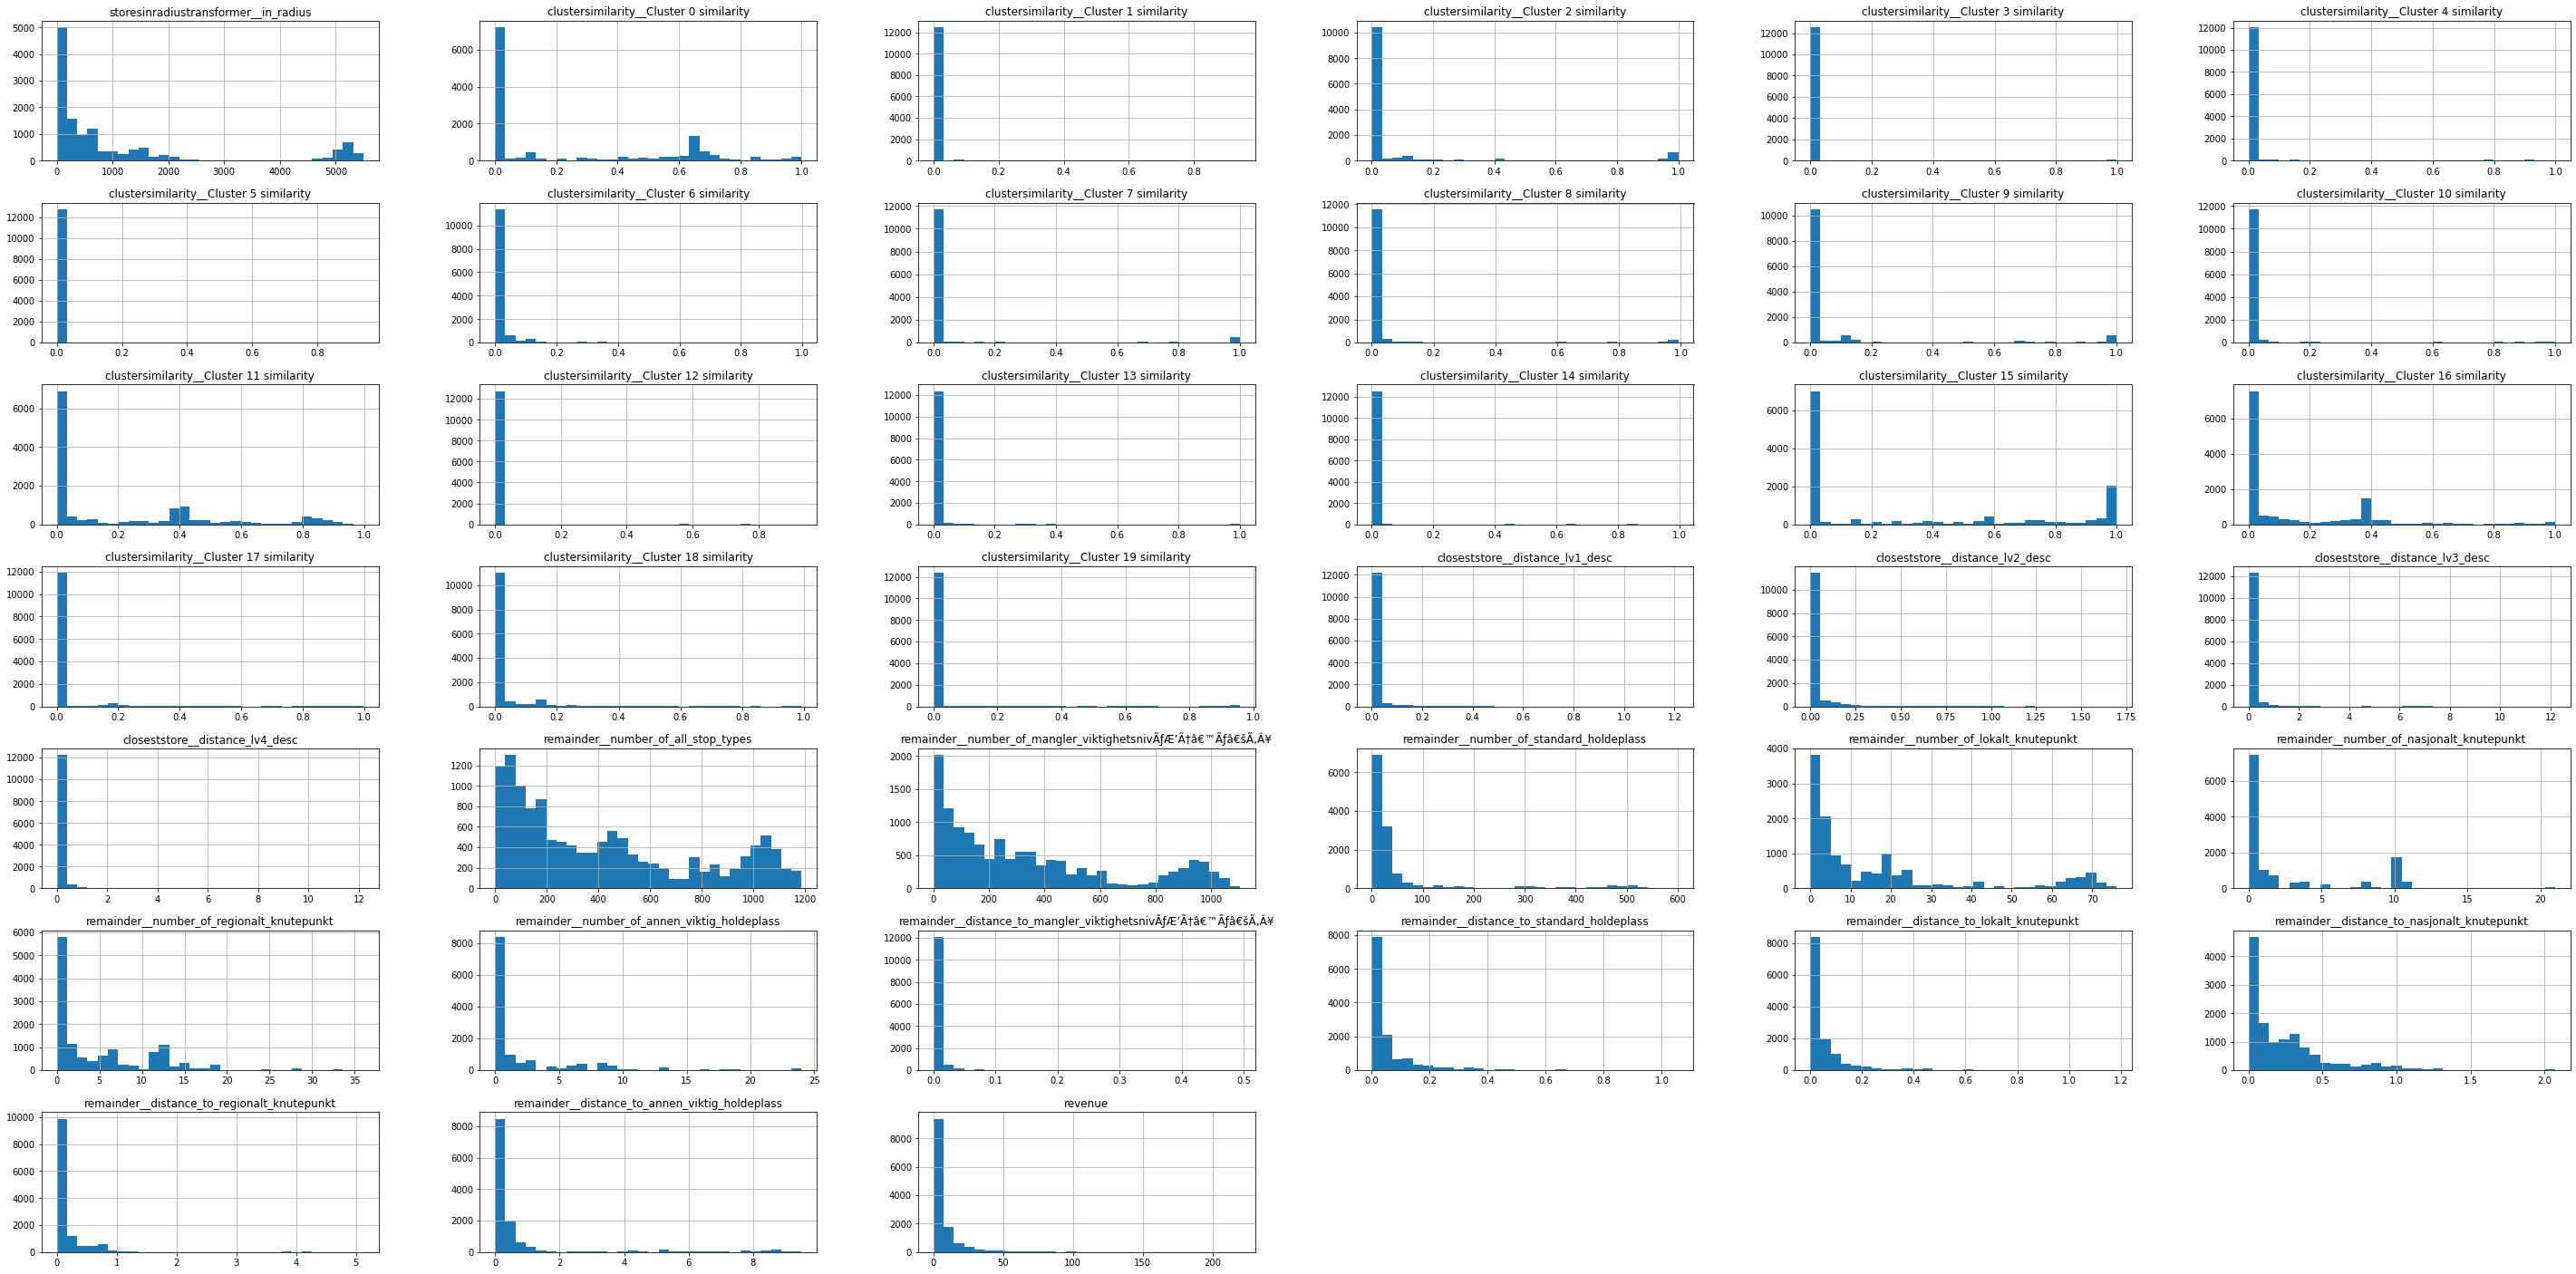

In [136]:
df_x.hist(bins=30, figsize = (50,25))